In [35]:
import os
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [36]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(int(nGraphRow), int(nGraphPerRow), int(i + 1))
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [47]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    # filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix', fontsize=15)
    plt.show()

In [38]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [39]:
df = pd.read_json("dataset.json", orient="columns")

In [40]:
df._id = df._id.apply(lambda x: x["$oid"])

In [41]:
df.createdAt = df.createdAt.apply(lambda x: x["$date"])

In [42]:
df.updatedAt = df.updatedAt.apply(lambda x: x["$date"])

In [43]:
df = df.drop("raws", axis=1)

In [44]:
df

,_id,label,hand,annotator,count,periodNS,createdAt,updatedAt,__v
0,5c5e933a6d627a480d243b88,upper-cut,right,0,149,1.489000e+09,2019-02-09T08:45:46.602Z,2019-02-09T08:45:46.602Z,0
1,5c5e933a6d627a480d243cbb,upper-cut,right,0,157,1.566000e+09,2019-02-09T08:45:46.603Z,2019-02-09T08:45:46.603Z,0
2,5c5e93486d627a480d243de3,upper-cut,right,0,138,1.336000e+09,2019-02-09T08:46:00.731Z,2019-02-09T08:46:00.731Z,0
3,5c5e93486d627a480d243f43,upper-cut,right,0,213,2.246000e+09,2019-02-09T08:46:00.731Z,2019-02-09T08:46:00.731Z,0
4,5c5e934d6d627a480d2441e7,frontal,right,1,185,1.805000e+09,2019-02-09T08:46:05.593Z,2019-02-09T08:46:05.593Z,0
...,...,...,...,...,...,...,...,...,...
7601,5c8679afe035bf37dcffefa5,no-action,left,7,260,2.483000e+09,2019-03-11T15:07:27.977Z,2019-03-11T15:07:27.977Z,0
7602,5c8679b2e035bf37dcfff1aa,no-action,left,7,256,2.483000e+09,2019-03-11T15:07:30.329Z,2019-03-11T15:07:30.329Z,0
7603,5c8679b2e035bf37dcfff3a8,no-action,left,7,253,2.484000e+09,2019-03-11T15:07:30.918Z,2019-03-11T15:07:30.918Z,0
7604,5c8679b5e035bf37dcfff5a5,no-action,left,7,255,2.488000e+09,2019-03-11T15:07:33.746Z,2019-03-11T15:07:33.746Z,0


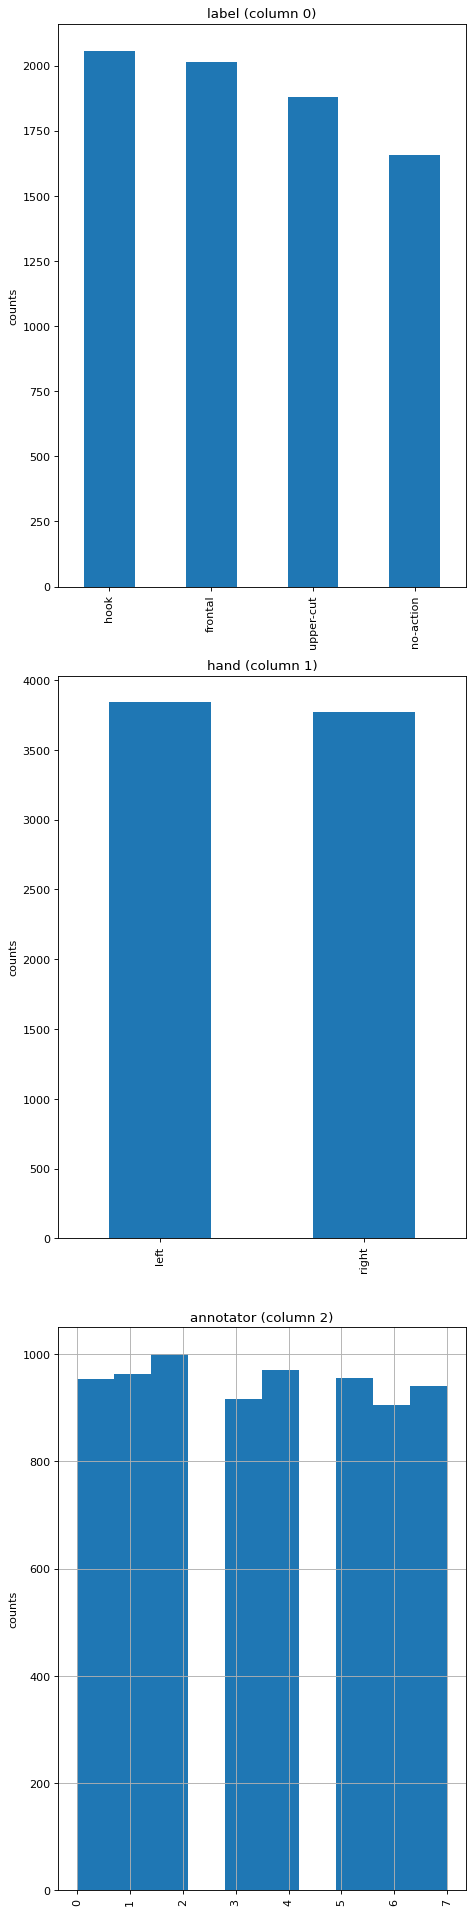

In [45]:
plotPerColumnDistribution(df, 10, 1)

C:\Users\kevin\AppData\Local\Temp\ipykernel_4564\1166599913.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns') # drop columns with NaN


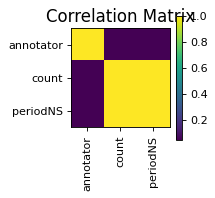

In [48]:
plotCorrelationMatrix(df, 2)